#### Modelos de Classificação e Regressão Logística

1. Utilizando o data set iris (iris.csv em anexo ou usandoo sklearn):
Exemplo de como fazer a importação do dataset usando o sklearn

```python
from sklearn import datasets
iris = datasets.load_iris()
```

Responda:

a. Faça uma análise inicial sobre esse dataset

In [30]:
import pandas as pd
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Carregar o dataset corretamente
iris_df = pd.read_csv('/content/drive/MyDrive/colab-notebooks/estatisticas-com-python-exercicios/exercicios-classificacao-e-regressao-logistica/iris.csv')

# Exibir as primeiras linhas
print(iris_df.head())

# Estatísticas descritivas
print(iris_df.describe())

# Verificar valores nulos
print(iris_df.isnull().sum())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
       Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max    

b. Use o boxplot e o histograma para caracterizar as propriedades  de cada uma das espécies existentes

o mesmo código pode ser repetido para Sepal_Width, Petal_Length e Petal_Width.

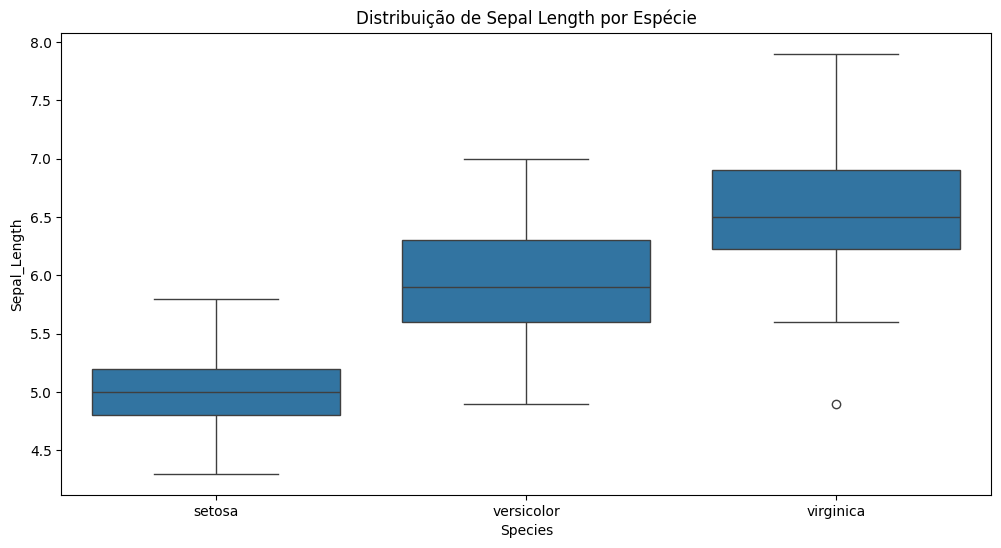

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot por espécie
plt.figure(figsize=(12, 6))
sns.boxplot(x="Species", y="Sepal_Length", data=iris_df)
plt.title("Distribuição de Sepal Length por Espécie")
plt.show()

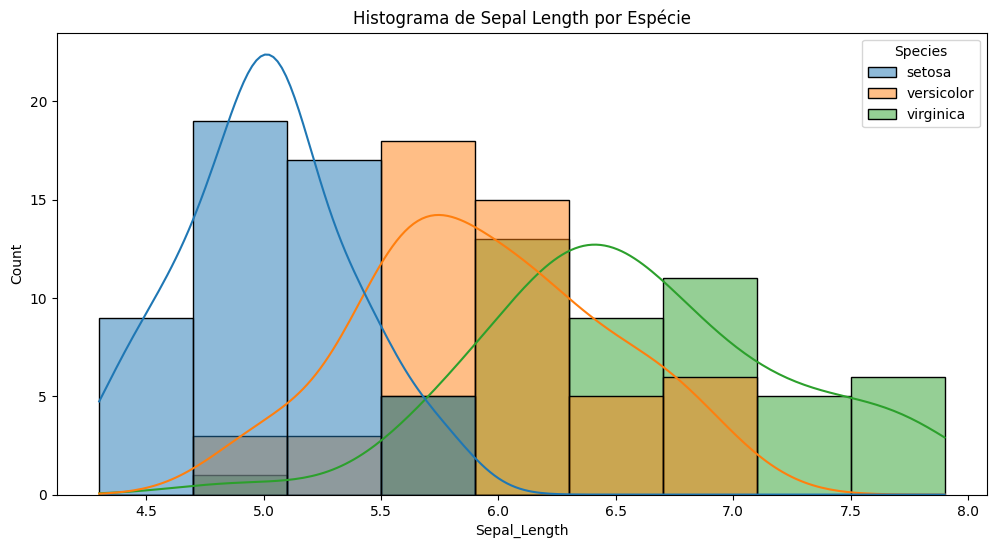

In [35]:
# Histograma por espécie
plt.figure(figsize=(12, 6))
sns.histplot(iris_df, x="Sepal_Length", hue="Species", kde=True)
plt.title("Histograma de Sepal Length por Espécie")
plt.show()

c. Somente olhando esses gráficos, é possível afirmar que uma  ou mais propriedades (Sepal_Length, Sepal_Width, Petal_Length, Petal_Width) são suficientes para distinguir as espécies?

In [27]:
print("""
Sim. A partir dos boxplots e histogramas, é possível observar que as medidas de petal_length e petal_width separam bem a espécie 'setosa' das demais.
Já as espécies 'versicolor' e 'virginica' têm mais sobreposição, especialmente em sepal_width, o que pode dificultar a separação sem um modelo.
""")


Sim. A partir dos boxplots e histogramas, é possível observar que as medidas de petal_length e petal_width separam bem a espécie 'setosa' das demais.
Já as espécies 'versicolor' e 'virginica' têm mais sobreposição, especialmente em sepal_width, o que pode dificultar a separação sem um modelo.



d. Aplique a regressão logística para avaliar o modelo de  classificação

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Separando variáveis explicativas e alvo usando a variável correta
X = iris_df.drop(columns=["Species"])
y = iris_df["Species"]

# Transformar os rótulos categóricos em numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Divisão do dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar modelo
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predições
y_pred = model.predict(X_test)

print("Modelo treinado com sucesso!")

Modelo treinado com sucesso!


e. Calcule a acurácia, precisão e recall

In [38]:
# Cálculo das métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")

print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Acurácia: 1.00
Precisão: 1.00
Recall: 1.00


f. Plote a matriz de confusão com matplotlib ou seaborn

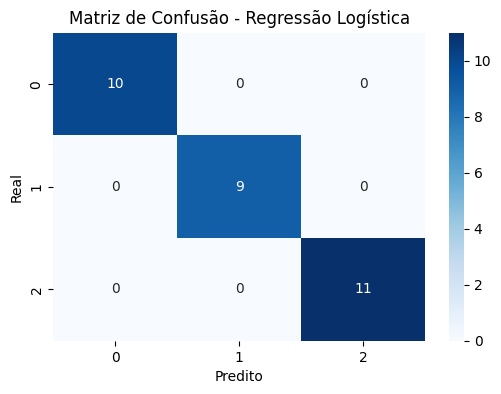

In [39]:
import seaborn as sns

# Criar matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()

2. Utilizando o dataset load_digits. Exemplo de como fazer a  importação do dataset usando o sklearn:

```python
from sklearn.datasets import
load_digits
digits = load_digits()
```

Responda:

a. Faça uma análise inicial sobre esse  dataset:  
i. Quantos dados possui?  
ii. Existem dados nulos? Se sim quantos?  
iii. Todos são dados numéricos ou existem colunas com dados  categóricos?

In [40]:
from sklearn.datasets import load_digits

# Carregar dataset
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

# Número de amostras e verificar nulos
print(f"O dataset contém {X_digits.shape[0]} amostras.")
print(f"Existem {sum(pd.DataFrame(X_digits).isnull().sum())} valores nulos.")

# Verificar se há dados categóricos
print(f"Todos os dados são numéricos: {X_digits.dtype == 'float64'}")

O dataset contém 1797 amostras.
Existem 0 valores nulos.
Todos os dados são numéricos: True


b. Aplique a regressão logística para construir e avaliar o modelo de
classificação

In [42]:
X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(X_digits, y_digits, test_size=0.2, random_state=42)

model_digits = LogisticRegression(max_iter=1000)
model_digits.fit(X_train_digits, y_train_digits)

y_pred_digits = model_digits.predict(X_test_digits)

c. Calcule a acurácia, precisão e recall com base no desempenho do modelo

In [43]:
accuracy_digits = accuracy_score(y_test_digits, y_pred_digits)
precision_digits = precision_score(y_test_digits, y_pred_digits, average="macro")
recall_digits = recall_score(y_test_digits, y_pred_digits, average="macro")

print(f"Acurácia: {accuracy_digits:.2f}")
print(f"Precisão: {precision_digits:.2f}")
print(f"Recall: {recall_digits:.2f}")

Acurácia: 0.97
Precisão: 0.98
Recall: 0.98


d. Plote a matriz de confusão dos resultados do modelo utilizando matplotlib ou seaborn

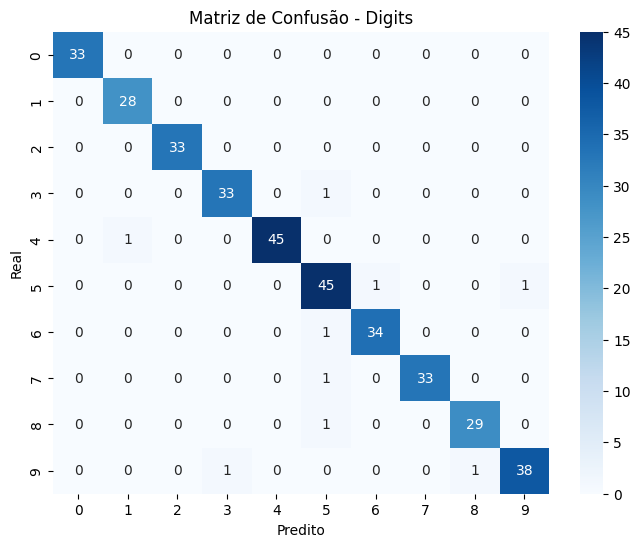

In [44]:
conf_matrix_digits = confusion_matrix(y_test_digits, y_pred_digits)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_digits, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Digits")
plt.show()

e. Aplique a regressão logística para avaliar o modelo de classificação dos
dígitos de 0 a 9 utilizando o conjunto de dados específico para esse problema (por exemplo, MNIST)

In [46]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Carregar o dataset MNIST
mnist = fetch_openml('mnist_784', version=1, parser='pandas')

# Separando variáveis explicativas e alvo
X_mnist = mnist.data
y_mnist = mnist.target.astype(int)  # Convertendo para inteiro

# Normalização dos dados para melhorar a performance do modelo
scaler = StandardScaler()
X_mnist = scaler.fit_transform(X_mnist)

# Divisão treino/teste
X_train_mnist, X_test_mnist, y_train_mnist, y_test_mnist = train_test_split(X_mnist, y_mnist, test_size=0.2, random_state=42)

# Treinar modelo de regressão logística
model_mnist = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial', n_jobs=-1)
model_mnist.fit(X_train_mnist, y_train_mnist)

# Predições
y_pred_mnist = model_mnist.predict(X_test_mnist)

print("Modelo treinado com sucesso!")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Modelo treinado com sucesso!


f. Calcule a acurácia, precisão e recall com base no desempenho do modelo
para a classificação dos dígitos de 0 a 9

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Cálculo das métricas
accuracy_mnist = accuracy_score(y_test_mnist, y_pred_mnist)
precision_mnist = precision_score(y_test_mnist, y_pred_mnist, average="macro")
recall_mnist = recall_score(y_test_mnist, y_pred_mnist, average="macro")

print(f"Acurácia: {accuracy_mnist:.2f}")
print(f"Precisão: {precision_mnist:.2f}")
print(f"Recall: {recall_mnist:.2f}")

Acurácia: 0.92
Precisão: 0.91
Recall: 0.91


g. Plote a matriz de confusão dos resultados da classificação dos dígitos de 0 a 9 utilizando matplotlib ou seaborn

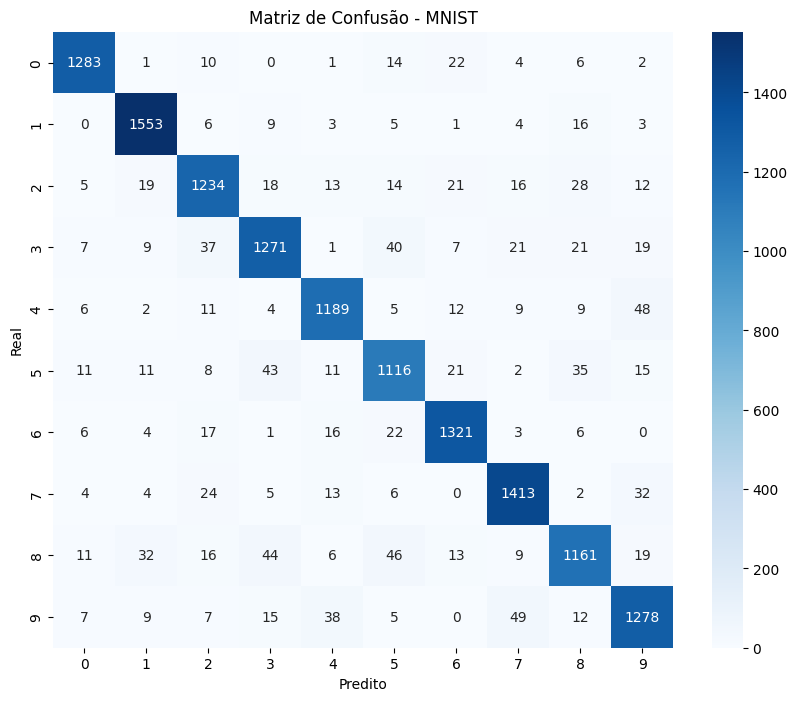

In [48]:
from sklearn.metrics import confusion_matrix

# Criar matriz de confusão
conf_matrix_mnist = confusion_matrix(y_test_mnist, y_pred_mnist)

# Plotar matriz de confusão
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_mnist, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - MNIST")
plt.show()